<a href="https://colab.research.google.com/github/sanzhkzz/Applied-Machine-Learning-/blob/main/DataMining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sre_constants import error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/amazon_reviews.xlsx",nrows=300000)
print(data.shape)

(300000, 15)


In [ ]:
data=data.drop(columns='Unnamed: 0')
data=data.drop_duplicates()

# **EXPLORATORY DATA ANALYSIS**

userName: Name of the user who wrote the review.

verified: Indicates if the review is from a verified purchase (True/False).

itemName: Name of the product reviewed.

description: Detailed description of the product.

image: URL or path to the product image.

brand: Brand of the product.

feature: Key features of the product.

category: Product category (e.g., Electronics, Clothing).

price: Price of the product.

rating: User's star rating for the product (e.g., 1 to 5).

reviewTime: Date when the review was posted.

summary: Short summary of the review.

reviewText: Full text of the review.

vote: Number of helpful votes the review received.

In [ ]:
def categorize_user(user_name):
    if user_name == "Amazon Customer":
        return "Amazon Customer"
    elif user_name == "Kindle Customer":
        return "Kindle Customer"
    else:
        return "Other Users"

data['user_group'] = data['userName'].apply(categorize_user)

<ipython-input-4-95cd95564e5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_group'] = data['userName'].apply(categorize_user)


In [ ]:
def convert_price_to_float(price):
    try:
        return float(price.replace('$', '').replace(',', ''))
    except (ValueError, AttributeError):
        return None

data['price_converted'] = data['price'].apply(convert_price_to_float)

print(data[['price_converted']].head())

   price_converted
0             1.63
1             6.40
2             7.99
3            14.18
4              NaN


In [ ]:
data['price_converted'] = data['price_converted'].interpolate(method='linear')

print(data[['price_converted']].head())

   price_converted
0         1.630000
1         6.400000
2         7.990000
3        14.180000
4        19.116667


In [ ]:
data.groupby('user_group').agg(
    total_reviews=('userName', 'count'),
    average_rating=('rating', 'mean'),
    verified_purchase_rate=('verified', 'mean'),
    sum_basket=('price_converted','sum'),
    average_basket=('price_converted','mean'),
    most_common_category=('category', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index().sort_values(by='sum_basket', ascending=False)

,user_group,total_reviews,average_rating,verified_purchase_rate,sum_basket,average_basket,most_common_category
2,Other Users,251334,4.344310,0.948962,5.123286e+06,20.377483,Pet_Supplies
0,Amazon Customer,18047,4.422508,0.972793,3.506075e+05,19.427466,Pet_Supplies
1,Kindle Customer,1172,4.372014,0.967577,2.006901e+04,17.123730,Pet_Supplies


In [ ]:
df=data.groupby('category').agg(
    total_reviews=('userName', 'count'),
    average_rating=('rating', 'mean'),
    verified_purchase_rate=('verified', 'mean'),
    sum_basket=('price_converted','sum'),
    average_basket=('price_converted','mean'),
    most_common_brand=('brand', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index().sort_values(by='sum_basket',ascending=False)

In [ ]:
df

,category,total_reviews,average_rating,verified_purchase_rate,sum_basket,average_basket,most_common_brand
12,Pet_Supplies,95347,4.250186,0.959606,2.015906e+06,21.134409,KONG
6,Grocery_and_Gourmet_Food,51660,4.398456,0.924183,1.004140e+06,19.431090,KIND
11,Patio_Lawn_and_Garden,25018,4.337384,0.970183,6.617054e+05,26.448117,Weber
10,Office_Products,31818,4.477515,0.962760,6.590861e+05,20.712301,HP
4,Cell_Phones_and_Accessories,20304,4.234193,0.943864,4.001281e+05,19.702979,OtterBox
3,Arts_Crafts_and_Sewing,19193,4.525137,0.976817,2.791313e+05,14.541876,Red Heart
9,Musical_Instruments,8782,4.468003,0.959690,1.724994e+05,19.642378,D'Addario
15,Video_Games,6396,4.340472,0.928091,1.475300e+05,23.062373,by\n \n Nintendo
7,Industrial_and_Scientific,3067,4.449478,0.954694,6.310936e+04,20.570197,3D Solutech
13,Prime_Pantry,7761,4.503921,0.899216,4.544239e+04,5.841675,Quaker


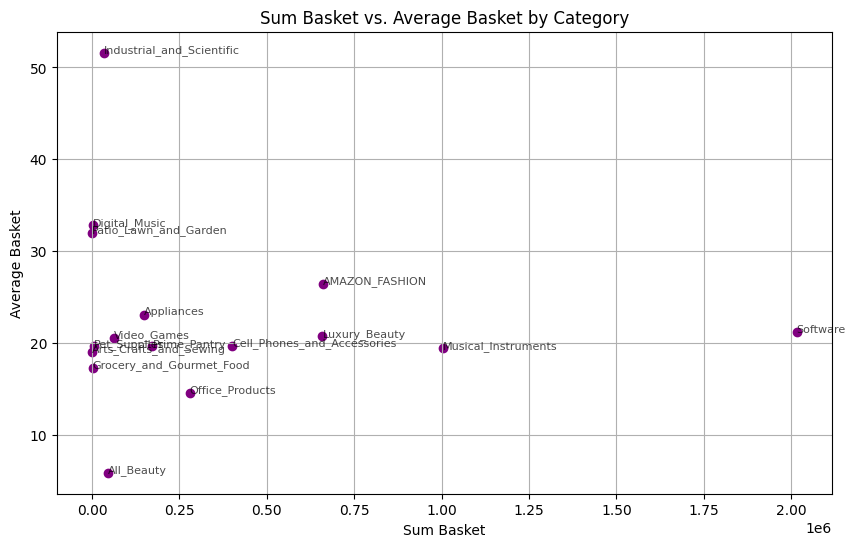

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['sum_basket'], df['average_basket'], color='purple')
plt.xlabel('Sum Basket')
plt.ylabel('Average Basket')
plt.title('Sum Basket vs. Average Basket by Category')
for i, txt in enumerate(df['category']):
    plt.annotate(txt, (df['sum_basket'][i], df['average_basket'][i]), fontsize=8, alpha=0.7)
plt.grid(True)
plt.show()

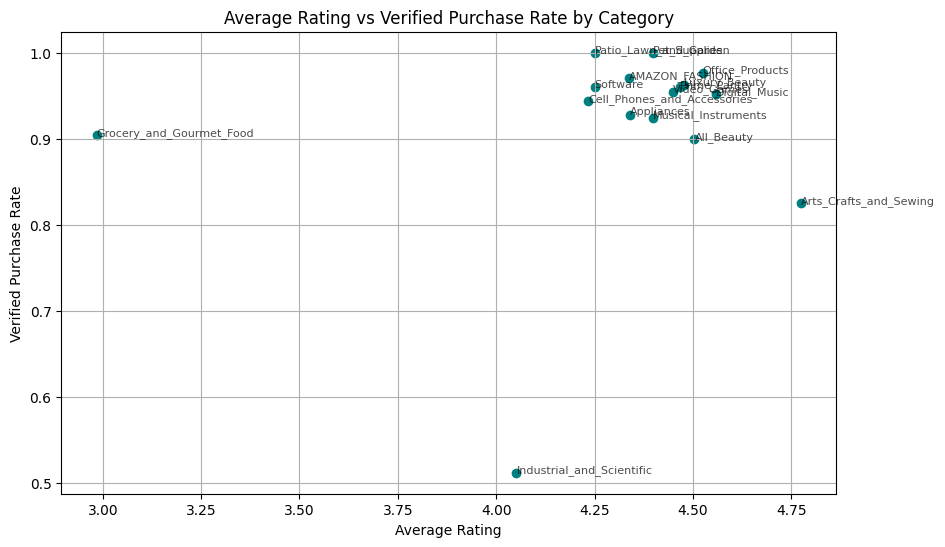

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['average_rating'], df['verified_purchase_rate'], color='teal')
plt.xlabel('Average Rating')
plt.ylabel('Verified Purchase Rate')
plt.title('Average Rating vs Verified Purchase Rate by Category')
for i, txt in enumerate(df['category']):
    plt.annotate(txt, (df['average_rating'][i], df['verified_purchase_rate'][i]), fontsize=8, alpha=0.7)
plt.grid(True)
plt.show()

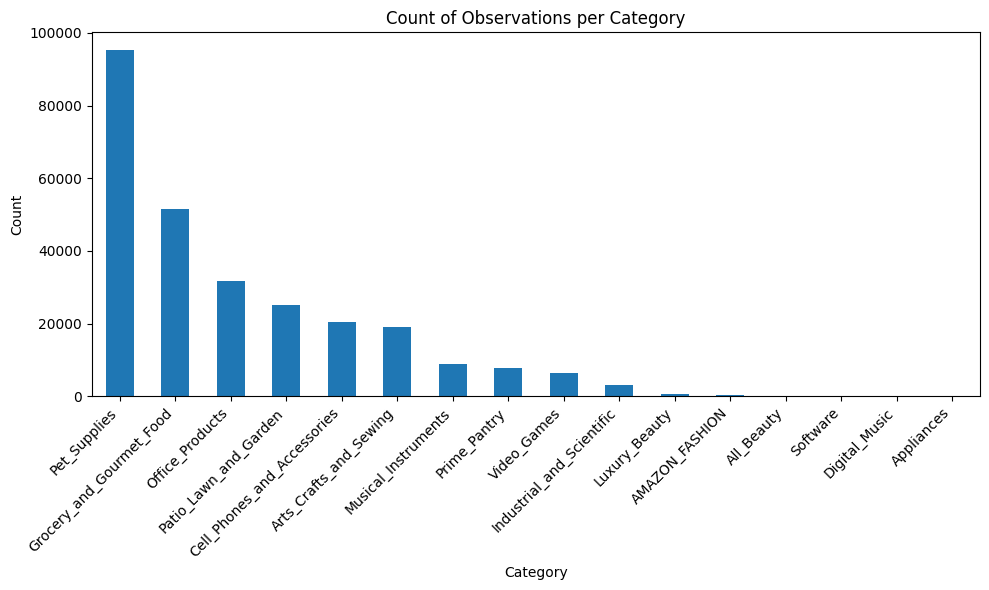

In [ ]:
import matplotlib.pyplot as plt


category_counts = data['category'].value_counts()
category_counts
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Observations per Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

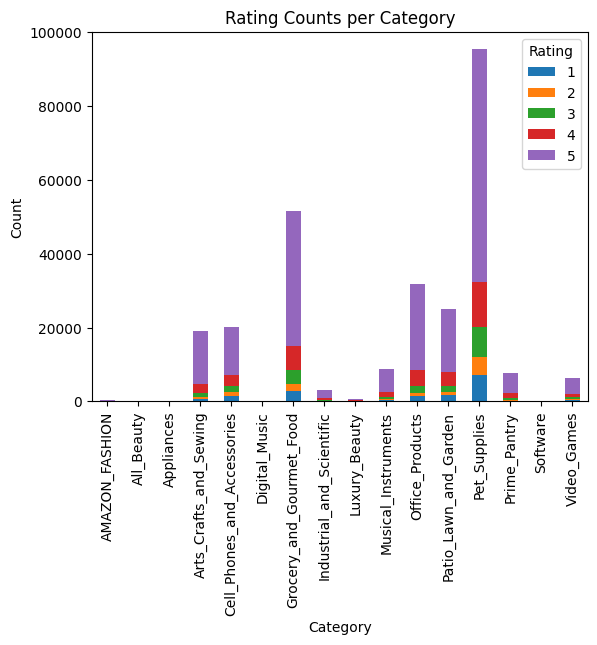

In [ ]:
rating_counts_per_category = data.groupby('category')['rating'].value_counts().unstack(fill_value=0)
rating_counts_per_category


# Plot stacked bar chart
rating_counts_per_category.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Rating Counts per Category')
plt.legend(title='Rating')
plt.show()

In [ ]:
category_counts = data['category'].value_counts()

# Get top 8 categories
top_5_categories = category_counts.head(5)

top_5_categories_list = top_5_categories.index.tolist()
top_5_categories_list

['Pet_Supplies',
 'Grocery_and_Gourmet_Food',
 'Office_Products',
 'Patio_Lawn_and_Garden',
 'Cell_Phones_and_Accessories']

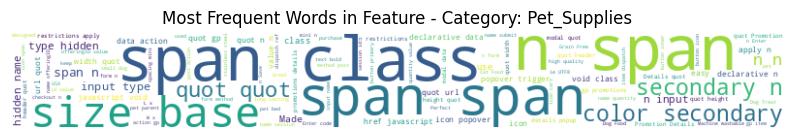

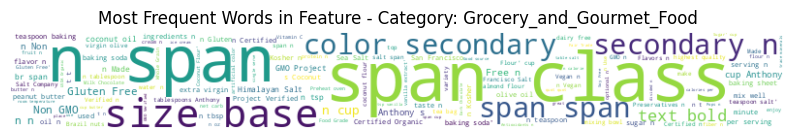

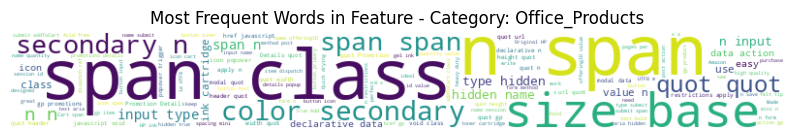

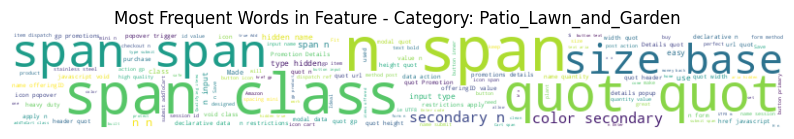

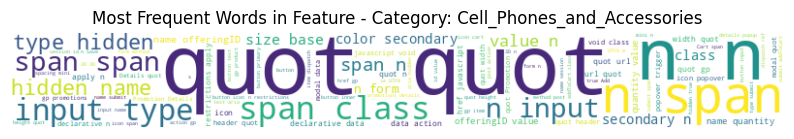

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each category
for category in top_5_categories_list:
    # Drop rows with missing values in 'reviewText' column
    text = ' '.join(data[data['category'] == category]['feature'].dropna().astype(str))

    # Create WordCloud object with max_words parameter
    wordcloud = WordCloud(width=800, height=100, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in Feature - Category: {category}')
    plt.axis('off')
    plt.show()

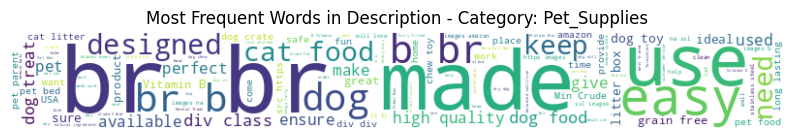

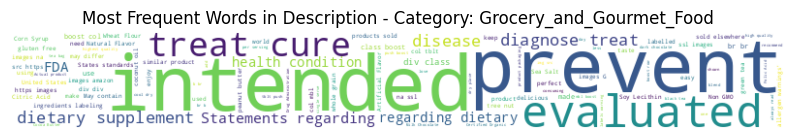

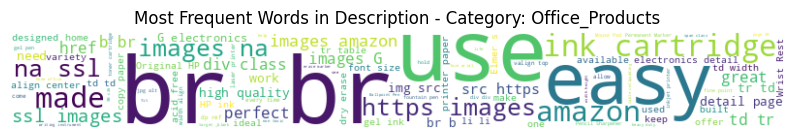

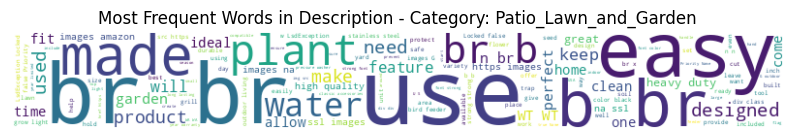

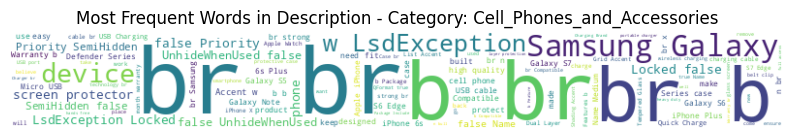

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each category
for category in top_5_categories_list:
    # Drop rows with missing values in 'reviewText' column
    text = ' '.join(data[data['category'] == category]['description'].dropna().astype(str))

    # Create WordCloud object with max_words parameter
    wordcloud = WordCloud(width=800, height=100, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in Description - Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
wordcloud

# **FEATURE ENGINEERING** #


To make work easier for us to, in terms of work with features we will do following steps:

**1. Combine itemName, description, and feature into a single text feature for TF-IDF vectorization.**

**2. Use category or brand to group items before calculating similarities.**

**3. Use price and rating for filtering or adjusting recommendation scores.**

Okay, here are the things I'm gonna implement for better feature engineering next. Instead of dealing with three different columns that contain text it's better to combine them all.

**1. Combine itemName, description, and feature into a single text feature for TF-IDF vectorization.** -> after we done combining that we need to is remove stopwords, symbols and other non-important information, also include lemmatization, stemming for better weights contribution during TF-IDF. ***Here, I don't only apply TF-IDF but also apply SBERT which can be somehow better than TF-IDF***. You can see it from the screenshot below

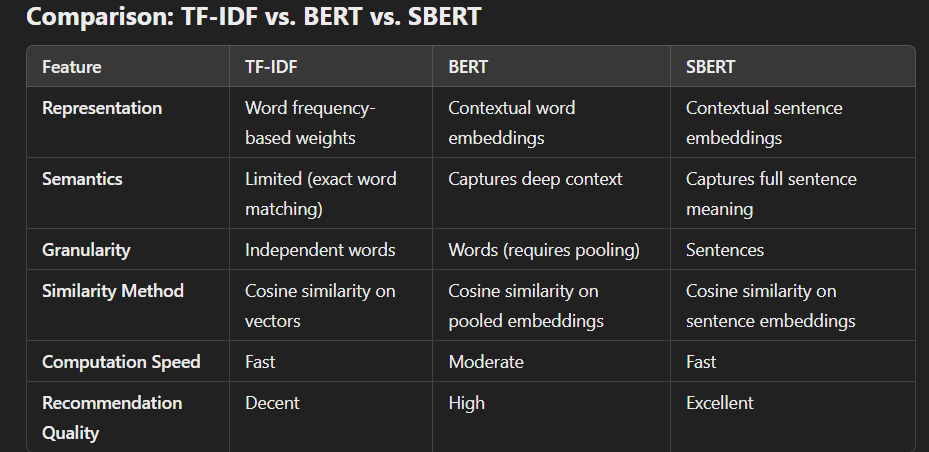

**2. Use price and rating for filtering or adjusting recommendation scores.** -> here, we also combine two different columns into a single. This step is needed to evaluate price/rating ratio, which is no less important in terms of getting best options to recommend. That is the way formula has computed:

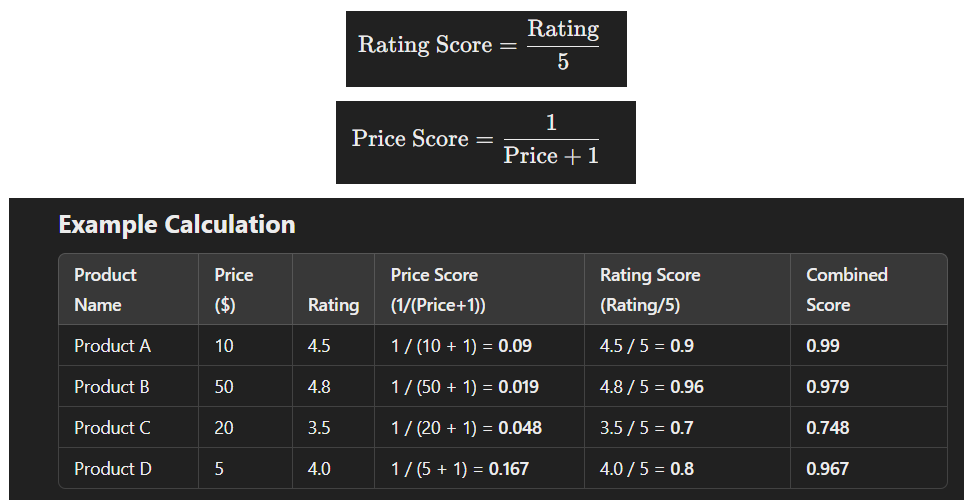


Then, after we do calculations we normalize score, where:
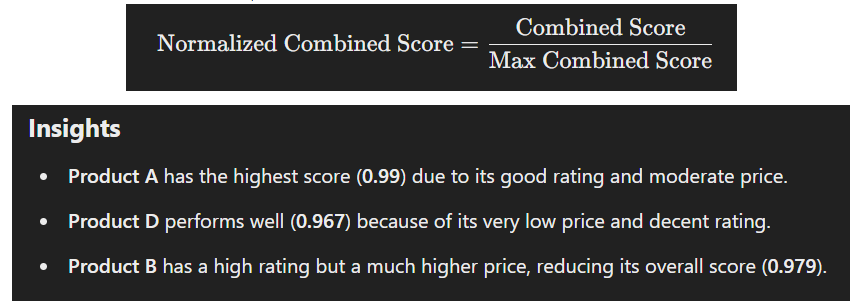



**3. Boosting during offering recommendation item to user (if brand/category) the same.** -> For example if I have snacks from Toblerone/Chocolate bars and recommendation system offering me another item that is made by Toblerone and another chocolate bar. It will boost score of the recommendation, as in example below:

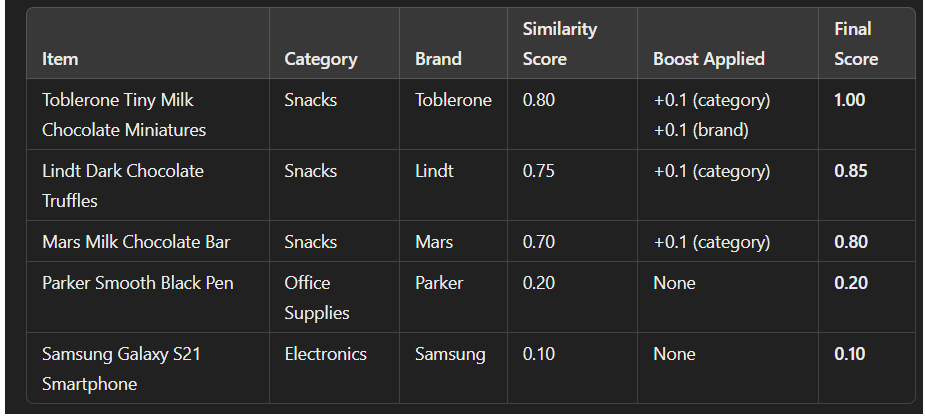


In [ ]:
data.shape

(270638, 16)

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(270638, 16)

In [ ]:
null_percentage = (data.isnull().sum() / len(data)) * 100

# Display the result
print(null_percentage)

userName            0.031407
verified            0.000000
itemName            0.000369
description         0.002586
image               0.000000
brand               0.580480
feature             0.000000
category            0.000000
price              14.335385
rating              0.000000
reviewTime          0.000000
summary             0.038058
reviewText          0.069835
vote                0.000000
user_group          0.000000
price_converted     0.000000
dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Fill missing values in all columns
data = data.fillna("")

# Step 1: Combine 'itemName', 'description', and 'feature' into a single text feature
def combine_text_features(row):
    return f"{row['itemName']} {row['description']} {row['feature']}"

data['combined_text'] = data.apply(combine_text_features, axis=1)




# Step 3: Combine 'price' and 'rating' into a normalized score
def combine_price_rating(row, max_price=100, max_rating=5):
    # Clean 'price' and convert it to numerical
    try:
        price = float(row['price'].replace('$', '')) if row['price'] else np.nan
    except:
        price = np.nan
    rating = float(row['rating']) if row['rating'] else np.nan

    # Normalize price and rating
    if np.isnan(price) or price > max_price:
        price_score = 0
    else:
        price_score = 1 - (price / max_price)  # Normalize price (lower is better)

    rating_score = rating / max_rating if not np.isnan(rating) else 0  # Normalize rating to 0-1 scale
    combined_score = price_score + rating_score

    # Normalize combined score to 0-1 range
    normalized_score = combined_score / 2  # Max possible combined score is 2 (1 from price + 1 from rating)
    return normalized_score

data['price_rating_score'] = data.apply(lambda row: combine_price_rating(row), axis=1)

# Display a sample of the updated dataset
data[['combined_text', 'price_rating_score']].head()

,combined_text,price_rating_score
0,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...",0.99185
1,"Prince of Peace Organic Tea, Oolong, 100 Tea B...",0.96800
2,"Pet Champion Adjustable No-Pull Harness, Colla...",0.96005
3,Koh-I-Noor Progresso Woodless Colored 24-Penci...,0.92910
4,"Parker Urban Premium Ebony Metal Chiseled, Bal...",0.50000


In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.7 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=607f2db7ab3dbc4f261bece621b14958be0b96c30504f4d116088d828ddc0b6f
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
from pandarallel import pandarallel  # For parallel apply

# Initialize parallel processing
pandarallel.initialize(progress_bar=True)

# Download NLTK data (stopwords and wordnet)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords, lemmatizer, and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Text preprocessing function to clean and process text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(words)

# Step 1: Combine text features using vectorized string operations
data['combined_text'] = (
    data['itemName'].fillna('') + ' ' +
    data['description'].fillna('') + ' ' +
    data['feature'].fillna('')
)

# Step 2: Apply preprocessing in parallel
data['combined_text'] = data['combined_text'].parallel_apply(preprocess_text)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Step 3: Initialize SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

# Step 4: Encode the first 50k rows of the combined_text column
batch_texts = data['combined_text'].tolist()
embeddings = model.encode(batch_texts, batch_size=512, show_progress_bar=True, convert_to_tensor=False)




Batches:   0%|          | 0/529 [00:00<?, ?it/s]

In [ ]:
data['sbert_embeddings'] = embeddings.tolist()

In [ ]:
data.to_excel('dataset_with_embeddings.xlsx', index=False, float_format='%.10f')

In [ ]:
import os
os.getcwd()

'/content'

#**COLLABORATIVE FILTERING**


In [3]:
import pandas as pd

data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_with_embeddings.xlsx')

In [4]:
data

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,user_group,price_converted,combined_text,price_rating_score,sbert_embeddings
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,Amazon Customer,1.630000,tobleron swiss milk chocol bar crunchi salt al...,0.99185,"[-0.06104812026023865, -0.03301185369491577, 0..."
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5,2018-01-01,Five Stars,Perfect for kombucha,0,Other Users,6.400000,princ peac organ tea oolong tea bag princ peac...,0.96800,"[-0.012951414100825787, -0.04272453114390373, ..."
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0,Other Users,7.990000,pet champion adjust nopul har collar leash mat...,0.96005,"[-0.03902246803045273, -0.05393486097455025, 0..."
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0,Other Users,14.180000,kohinoor progresso woodless color pencil set a...,0.92910,"[-0.032902173697948456, -0.029793808236718178,..."
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0,Other Users,19.116667,parker urban premium eboni metal chisel ballpo...,0.50000,"[-0.03568105399608612, -0.001591802341863513, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270633,Gabriel Vellanoweth,True,"Kurgo Loft Jacket, Reversible Dog Coat, Dog Co...",['Help Fido brave the chilly months of the yea...,['https://images-na.ssl-images-amazon.com/imag...,Kurgo,"['REVERSIBLE, REFLECTIVE, & ADJUSTABLE: This s...",Pet_Supplies,$31.49,4,2018-04-05,I like the style and it fits,This is a great product just need to make sure...,0,Other Users,31.490000,kurgo loft jacket revers dog coat dog coat col...,0.74255,"[-0.05624433234333992, 0.03140294924378395, 0...."
270634,Sarah W.,True,IRIS Airtight Food Storage Container,['IRIS Airtight Food Storage Container keeps m...,['https://images-na.ssl-images-amazon.com/imag...,"IRIS USA, Inc.",['Airtight pet food container is the ideal sol...,Pet_Supplies,$24.22,5,2018-04-05,Serves its purpose!,Fits my dogs 33 lbs bag of food! Keeps the foo...,0,Other Users,24.220000,iri airtight food storag contain iri airtight ...,0.87890,"[-0.0033506404142826796, -0.006416963879019022..."
270635,RR,True,Earth Rated 225-Count Extra-Large Dog Waste Ba...,"['""', 'Whether you have a large-breed dog or c...",['https://images-na.ssl-images-amazon.com/imag...,Earth Rated,['Extra Wide: Earth Rated large dog waste bags...,Pet_Supplies,$11.99,4,2018-04-05,Four Stars,Perfect sized bags for a household with 2 larg...,0,Other Users,11.990000,earth rate count extralarg dog wast bag poop b...,0.84005,"[0.04076293855905533, -0.041756968945264816, 0..."
270636,Savy shopper,True,iNNEXT Puppy Blanket for Pet Cushion Small Dog...,['<b>Pr

In [6]:
data.userName.value_counts()

,count
userName,
Amazon Customer,18047
Kindle Customer,1172
Mike,334
John,254
Susan,236
...,...
Paula Sylvester,1
Pat&#039;s Angel,1
DSH,1


In [7]:
data.itemName.value_counts()

,count
itemName,
Puppia Dog Harnesses,726
"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count",364
"KIND Bars, Caramel Almond and Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count",331
"Kind Bars, Madagascar Vanilla Almond, Gluten Free, Low Sugar, 1.4oz",331
"KIND Bars, Dark Chocolate Chili Almond, Gluten Free, 1.4 Ounce Bars, 12 Count",331
...,...
"Ruffwear - Cloud Chaser Breathable, Waterproof, Insulated Jacket",1
Golden State Fruit California Trio Fruit Gift Box,1
Tanka Natural Buffalo Bar Variety Pack 1 oz Pack of 6,1


In [5]:
import pandas as pd
from surprise import SVD, Dataset, Reader, accuracy # import accuracy directly from surprise
from surprise.model_selection import train_test_split

# Load your data into a Pandas DataFrame
# Assuming 'data' has columns 'userName', 'itemName', and 'rating'
df = data[['userName', 'itemName', 'rating']]

# Step 1: Prepare the data for Surprise
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(df, reader)

# Step 2: Split the data into train and test sets
trainset, testset = train_test_split(dataset, test_size=0.2)

# Step 3: Train the SVD model
model = SVD(n_factors=50)  # You can tune n_factors for better performance
model.fit(trainset)

# Step 4: Evaluate the model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

# Step 5: Make recommendations
def recommend_items(user_id, num_recommendations=5):
    # Get all items not yet rated by the user
    all_items = df['itemName'].unique()
    rated_items = df[df['userName'] == user_id]['itemName'].unique()
    unrated_items = [item for item in all_items if item not in rated_items]

    # Predict ratings for unrated items
    predictions = [(item, model.predict(user_id, item).est) for item in unrated_items]

    # Sort by predicted rating in descending order
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recommendations]
    print(recommendations)

    return [item for item, _ in recommendations]

# Example usage
user_id = df['userName'].iloc[7]  # Replace with an actual user ID
print(f"Top recommendations for user {user_id}: {recommend_items(user_id)}")


ModuleNotFoundError: No module named 'surprise'

In [2]:
data.columns

NameError: name 'data' is not defined

In [6]:
!pip install implicit

In [7]:
import pandas as pd
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
import numpy as np

data['price_converted'] = data['price_converted'].fillna(data['price_converted'].median())
data['price_normalized'] = (data['price_converted'] - data['price_converted'].min()) / (data['price_converted'].max() - data['price_converted'].min())

# Step 3: Compute the interaction score
data['interaction_score'] = data['rating'] * (1 + (data['price_normalized'] / 2))

# Map users and items to unique IDs
user_id_mapping = {user: idx for idx, user in enumerate(data['userName'].unique())}
item_id_mapping = {item: idx for idx, item in enumerate(data['itemName'].unique())}

data['user_id'] = data['userName'].map(user_id_mapping)
data['item_id'] = data['itemName'].map(item_id_mapping)

# Step 4: Create a sparse matrix using the interaction score
num_users = data['user_id'].nunique()
num_items = data['item_id'].nunique()

interaction_matrix = csr_matrix((data['interaction_score'], (data['user_id'], data['item_id'])), shape=(num_users, num_items))

# Step 5: Train the ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20, random_state=42)
model.fit(interaction_matrix.T)


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.02881455421447754 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:

# Step 6: Recommend items for a specific user
def recommend_items(user_id, num_recommendations=5):
    # Get the user’s interaction vector (items already interacted by the user)
    user_items = interaction_matrix[user_id].indices  # Get indices of non-zero entries (interacted items)

    # Map item IDs back to item names and retrieve their details
    item_id_to_name = {v: k for k, v in item_id_mapping.items()}
    interacted_items = [
        (
            item_id_to_name[item_id],
            data.loc[data['item_id'] == item_id, 'category'].values[0],
            data.loc[data['item_id'] == item_id, 'price_converted'].values[0],
            data.loc[data['item_id'] == item_id, 'rating'].values[0]
        )
        for item_id in user_items
    ]

    print(f"User ID: {user_id}")
    print("Items already interacted by the user:")
    for item_name, category, price, rating in interacted_items:
        print(f"\tItem: {item_name}\tCategory: {category}\tPrice: ${price:.2f}\tRating: {rating}")

    # Generate recommendations (item IDs and scores)
    recommendations = model.recommend(
        user_id,
        interaction_matrix[user_id],
        N=num_recommendations,
        filter_already_liked_items=False  # Include already liked items in recommendations
    )

    # Map recommended item IDs back to item names and retrieve their details
    recommended_items = [
        (
            item_id_to_name[item_id],
            data.loc[data['item_id'] == item_id, 'category'].values[0],
            data.loc[data['item_id'] == item_id, 'price_converted'].values[0],
            data.loc[data['item_id'] == item_id, 'rating'].values[0],
            score
        )
        for item_id, score in zip(recommendations[0], recommendations[1])
    ]

    print("\nTop recommendations for the user:")
    for item_name, category, price, rating, score in recommended_items:
        print(f"\tItem: {item_name}\tCategory: {category}\tPrice: ${price:.2f}\tRating: {rating}\tScore: {score}")

    return recommended_items

# Example usage: Recommend items for user with ID 8
user_id_example = 9
top_recommendations = recommend_items(user_id_example, num_recommendations=5)


User ID: 9
Items already interacted by the user:
	Item: PetSafe Freedom Aluminum Patio Panel Sliding Glass Dog and Cat Door	Category: Pet_Supplies	Price: $164.76	Rating: 1
	Item: Pet Gear Easy Step II Pet Stairs, 2 Step for Cats/Dogs up to 150 Pounds, Portable, Removable Washable Carpet Tread	Category: Pet_Supplies	Price: $32.74	Rating: 5

Top recommendations for the user:
	Item: Toblerone Swiss Milk Chocolate Bar, Crunchy Salted Almond, 3.52 Ounce	Category: Prime_Pantry	Price: $1.63	Rating: 5	Score: 1.0033234357833862
	Item: StarMark Everlasting Treat for Dogs	Category: Pet_Supplies	Price: $7.15	Rating: 4	Score: 0.4792570471763611
	Item: TaoTronics Led Grow lights Bulb, Grow Lights for Indoor Plants, Grow Lamp for Hydroponics Greenhouse Organic, Plant Lights (E26 12w 3 Bands)	Category: Patio_Lawn_and_Garden	Price: $8.98	Rating: 5	Score: 0.2689363658428192
	Item: Ethical Pets Gigglers Chicken Dog Toy Assorted	Category: Pet_Supplies	Price: $8.94	Rating: 5	Score: 0.2632979452610016
	Item

In [16]:
import random

# Step 1: Select a small number of users for evaluation
num_users_to_evaluate = 5
random_user_ids = random.sample(range(num_users), num_users_to_evaluate)

# Step 2: Set K (number of recommendations)
K = 5

# Step 3: Initialize variables to store metrics
total_precision = 0
total_recall = 0
total_map = 0
num_users_with_items = 0

# Step 4: Evaluate for each user
for user_id in random_user_ids:
    # Get actual items from the test set
    actual_items = test_interaction_matrix[user_id].indices
    if len(actual_items) == 0:
        continue  # Skip users with no items in the test set

    # Generate top-K recommendations
    recommended_items = [item_id for item_id, _ in model.recommend(user_id, train_interaction_matrix[user_id], N=K, filter_already_liked_items=False)]

    # Compute precision
    relevant_and_recommended = len(set(actual_items) & set(recommended_items))
    precision = relevant_and_recommended / K
    total_precision += precision

    # Compute recall
    recall = relevant_and_recommended / len(actual_items)
    total_recall += recall

    # Compute MAP
    relevant_positions = [i + 1 for i, item in enumerate(recommended_items) if item in actual_items]
    average_precision = sum([1 / pos for pos in relevant_positions]) / len(actual_items)
    total_map += average_precision

    num_users_with_items += 1

    # Print metrics for this user
    print(f"User ID: {user_id}")
    print(f"Actual items: {actual_items}")
    print(f"Recommended items: {recommended_items}")
    print(f"Precision@{K}: {precision:.4f}")
    print(f"Recall@{K}: {recall:.4f}")
    print(f"MAP@{K}: {average_precision:.4f}\n")

# Step 5: Compute overall metrics
overall_precision = total_precision / num_users_with_items
overall_recall = total_recall / num_users_with_items
overall_map = total_map / num_users_with_items

print(f"Overall Precision@{K}: {overall_precision:.4f}")
print(f"Overall Recall@{K}: {overall_recall:.4f}")
print(f"Overall MAP@{K}: {overall_map:.4f}")


ValueError: too many values to unpack (expected 2)

In [1]:
!pip install implicit==0.6.2 # Install a version of implicit which includes the deprecated recall_at_k function


In [8]:

import pandas as pd
import numpy as np

df=data.head()
# Step 1: Assign unique IDs to users and items
# Create a mapping for users and items to unique IDs
user_id_mapping = {user: idx for idx, user in enumerate(data['userName'].unique())}
item_id_mapping = {item: idx for idx, item in enumerate(data['itemName'].unique())}

# Apply the mapping to create 'user_id' and 'item_id' columns
data['user_id'] = data['userName'].map(user_id_mapping)
data['item_id'] = data['itemName'].map(item_id_mapping)

# Step 2: Keep only relevant columns for collaborative filtering
df_collab = data[['user_id', 'item_id', 'rating']]

# Display the transformed dataset
num_users = df_collab['user_id'].nunique()
num_items = df_collab['item_id'].nunique()
interaction_matrix = np.zeros((num_users, num_items))


In [10]:
interaction_matrix.shape

(80719, 81351)

In [ ]:
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,summary,reviewText,vote,user_group,price_converted,combined_text,price_rating_score,sbert_embeddings,user_id,item_id
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5,...,Five Stars,super smooth and yummy with crunchy bits,0,Amazon Customer,1.630000,tobleron swiss milk chocol bar crunchi salt al...,0.99185,"[-0.06104812026023865, -0.03301185369491577, 0...",0,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5,...,Five Stars,Perfect for kombucha,0,Other Users,6.400000,princ peac organ tea oolong tea bag princ peac...,0.96800,"[-0.012951414100825787, -0.04272453114390373, ...",1,1
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5,...,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0,Other Users,7.990000,pet champion adjust nopul har collar leash mat...,0.96005,"[-0.03902246803045273, -0.05393486097455025, 0...",2,2
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5,...,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0,Other Users,14.180000,kohinoor progresso woodless color pencil set a...,0.92910,"[-0.032902173697948456, -0.029793808236718178,...",3,3
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5,...,I love this pen,"I love this pen! I love the shape of it, the f...",0,Other Users,19.116667,parker urban premium eboni metal chisel ballpo...,0.50000,"[-0.03568105399608612, -0.001591802341863513, ...",4,4


In [ ]:
for row in df_collab.itertuples():
    interaction_matrix[row.user_id, row.item_id] = row.rating

In [ ]:
interaction_matrix

array([[5., 5., 5., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def matrix_factorization(R, K, steps=100, alpha=0.002, beta=0.02):
    """ Perform matrix factorization using SGD
    Args:
        R: User-item interaction matrix
        K: Number of latent factors
        steps: Number of iterations
        alpha: Learning rate
        beta: Regularization parameter
    Returns:
        P: User latent feature matrix
        Q: Item latent feature matrix
    """
    num_users, num_items = R.shape
    P = np.random.rand(num_users, K)
    Q = np.random.rand(num_items, K)

    for step in range(steps):
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:  # Only consider non-zero ratings
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)  # Compute error
                    for k in range(K):
                        P[i, k] += alpha * (2 * eij * Q[j, k] - beta * P[i, k])
                        Q[j, k] += alpha * (2 * eij * P[i, k] - beta * Q[j, k])

        # Compute total error
        total_error = 0
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    total_error += (R[i, j] - np.dot(P[i, :], Q[j, :].T)) ** 2
                    total_error += beta * (np.linalg.norm(P[i, :]) + np.linalg.norm(Q[j, :]))
        if total_error < 0.001:
            break
    return P, Q

# Step 5: Perform matrix factorization
K = 5  # Number of latent factors
P, Q = matrix_factorization(interaction_matrix, K)

# Step 6: Predict ratings by multiplying P and Q
predicted_interaction_matrix = np.dot(P, Q.T)

# Step 7: Function to predict rating for a user and an item using matrix factorization
def predict_rating(user_id, item_id):
    if user_id >= num_users or item_id >= num_items:
        return "User or item not found"
    return predicted_interaction_matrix[user_id, item_id]

# Example: Predict rating for a user and an item
user_id_example = 0  # Replace with actual user ID
item_id_example = 1  # Replace with actual item ID
predicted_rating = predict_rating(user_id_example, item_id_example)
print(f"Predicted rating for user {user_id_example} and item {item_id_example}: {predicted_rating}")

In [ ]:
import time

while True:
    time.sleep(60)  # Sleep for 60 seconds
    print("Keeping Colab session alive...")


Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping Colab session alive...
Keeping 

#**CONTENT-BASED FILTERING**

# **HYBRID SYSTEM**

In [ ]:
!pip install pandarallel